<a href="https://colab.research.google.com/github/janvigupta38/Human-_Face_Detection_OpenCv/blob/main/OPENCV_BOOTCAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


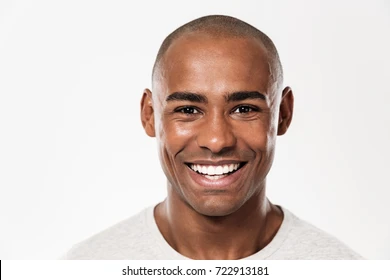

In [ ]:
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img=cv2.imread('/content/human pic.webp')
cv2_imshow(img)

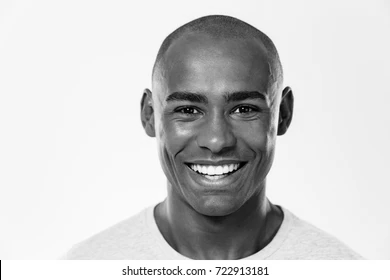

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

In [ ]:
faces=face_cascade.detectMultiScale(gray)
 #detectMultiScale will return 4 values that represent  a rectangle 
 #these values are  x,y  co-ordinates of top-left
 #next 2 are weight and height of rectangle
print(faces)

[[149  53 139 139]]


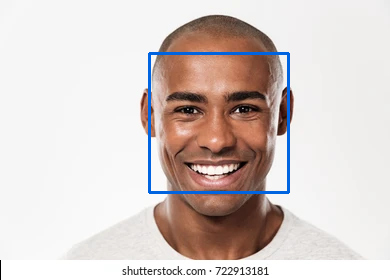

In [ ]:

for (x,y,w,h) in faces:
  #cv2.rectangle(image,co-ordinates of top-left,co-ordinates of bottom-right,color of rectangle, weight of lines/-1 to fill the rectangle)
  cv2.rectangle(img,(x,y),(x+w,y+h),(225,100,0),2)
cv2_imshow(img)

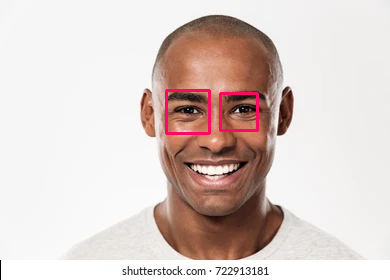

In [ ]:
eye_cascade=cv2.CascadeClassifier('/content/haarcascade_eye.xml')
img=cv2.imread('/content/human pic.webp')
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
eyes=eye_cascade.detectMultiScale(gray)
for (x,y,w,h) in eyes:
  cv2.rectangle(img,(x,y),(x+w,y+h),(100,10,250),2)
cv2_imshow(img)

In [ ]:

#vld=cv2.VideoCapture(0)
#while(True):

  #Capture the video frame
 # ret,frame=vld.read()

  #Display the resulting frame
  #cv2_imshow(frame)

  #the 'q' button is set as the
  #it is use for closing the video
  #if cv2.waitKey(1) & 0XFF==ord('q'):
   # break


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


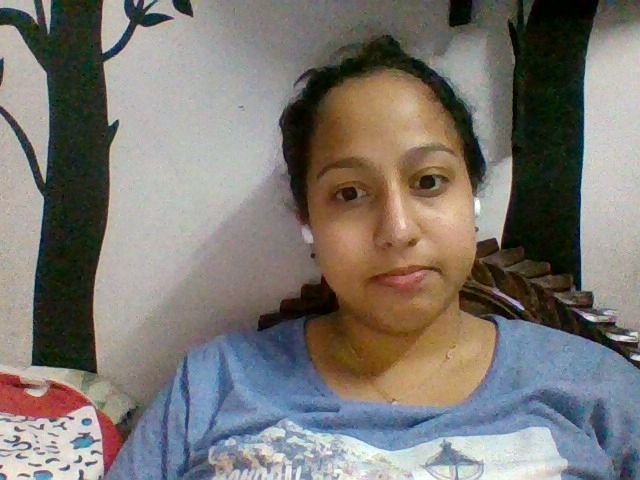

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

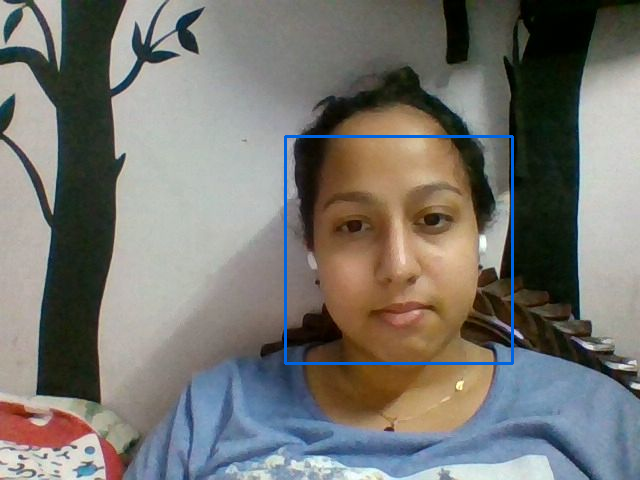

In [ ]:
face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img=cv2.imread('/content/photo.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
faces=face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
   cv2.rectangle(img,(x,y),(x+w,y+h),(225,100,0),2)
cv2_imshow(img)

In [ ]:
def fun_to_detect(img_path):
  face_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  img=cv2.imread(img_path)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  faces=face_cascade.detectMultiScale(gray)
  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(225,100,0),2)
  cv2_imshow(img)

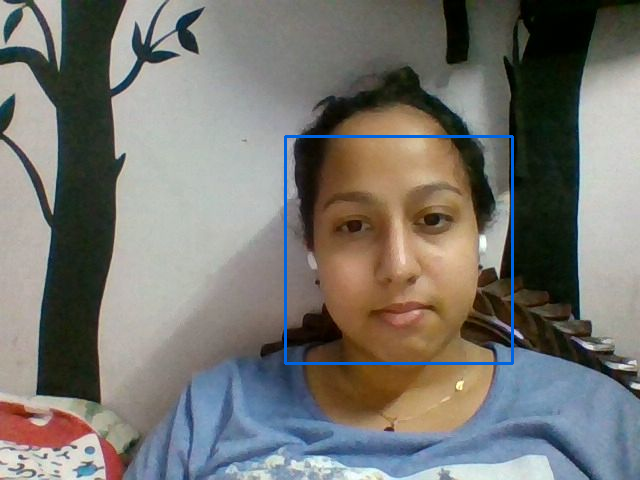

In [ ]:
fun_to_detect('/content/photo.jpg')

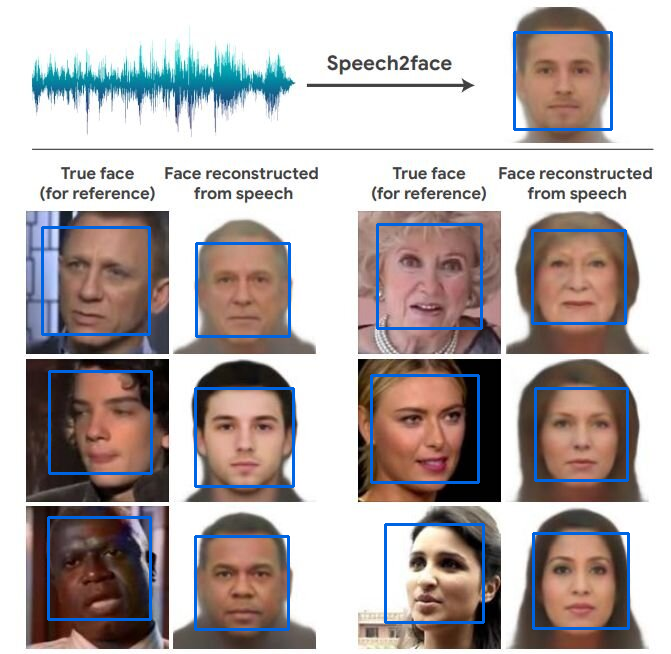

In [ ]:
fun_to_detect('/content/5d020eb457ae2.jpg')